In [82]:
import pandas as pd

In [83]:
df= pd.read_csv('data/test/일산화.csv')

In [84]:
df.head(2)

,SIDO,STD_YYYYMM,AVG_일산화,일산화_9BAD,일산화_BAD
0,서울특별시,201001,0.8,N,Y
1,부산광역시,201001,0.5,N,Y


In [85]:
df1 = pd.read_csv('data/test/차량.csv')
df1.head(2)

,SIDO,STD_YYYYMM,차량수
0,서울특별시,201101,2991173.0
1,부산광역시,201101,1153513.0


In [86]:
df2 = pd.read_csv('data/test/이산화.csv')

In [87]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [88]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [89]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_일산화,일산화_9BAD,일산화_BAD,차량수,AVG_이산화,이산화_0.06BAD,이산화_0.03BAD,이산화_BAD
0,서울특별시,201101,0.7,N,Y,2991173.0,0.035,N,Y,Y
1,부산광역시,201101,0.4,N,N,1153513.0,0.019,N,N,Y


In [90]:
result_df['이산화_0.03BAD'].value_counts()

이산화_0.03BAD
N    2194
Y     142
Name: count, dtype: int64

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [92]:
result_df.pivot_table('차량수', '일산화_BAD', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,차량수,차량수,차량수,차량수,차량수,차량수
일산화_BAD,,,,,,
N,1324,1.278272e+06,43568.0,6378632.0,1.166247e+06,1.360132e+12
Y,1012,1.383302e+06,95440.0,6402756.0,1.260351e+06,1.588483e+12


c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


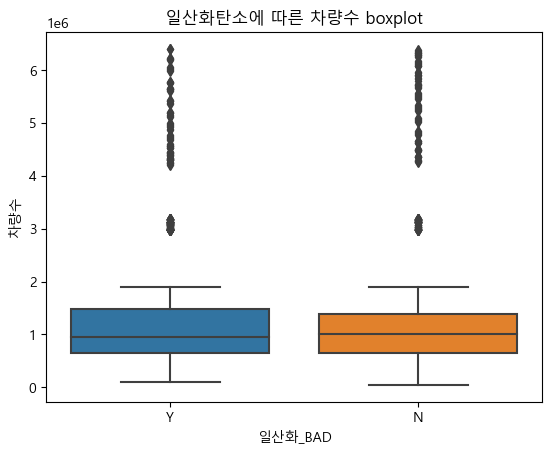

In [93]:
sns.boxplot(result_df, x='일산화_BAD', y='차량수')
plt.title('일산화탄소에 따른 차량수 boxplot');

In [94]:
import scipy as sp 
sp.stats.ttest_ind(result_df[result_df.일산화_BAD=='Y'].차량수, result_df[result_df.일산화_BAD=='N'].차량수, equal_var=False)

Ttest_indResult(statistic=2.06103151728841, pvalue=0.03942379159253649)

통계치 (statistic = 2.06103151728841):

통계치는 약 2.06입니다. 이 값은 두 집단 간의 평균 차이가 표준 오차로 나눠진 값입니다.
양의 통계치는 첫 번째 집단의 평균이 두 번째 집단의 평균보다 더 크다는 것을 나타냅니다.
이 값이 크면 클수록, 두 집단 간의 차이가 더 크다는 것을 의미합니다.
p-값 (pvalue=0.03942379159253649):

p-값은 약 0.039입니다. 이는 통계적으로 유의미한 결과를 나타냅니다 (일반적으로 p < 0.05를 유의미한 것으로 간주).
p-값은 두 집단 간에 차이가 없다는 귀무 가설(null hypothesis) 하에 관측된 데이터 또는 더 극단적인 데이터가 관측될 확률입니다. 이 경우, p-값이 0.05보다 작으므로 귀무 가설을 기각할 수 있습니다.
즉, 두 집단 간에는 통계적으로 유의미한 차이가 있을 가능성이 높습니다.
결론:

이 t-검정 결과는 두 집단 간에 통계적으로 유의미한 평균 차이가 있음을 나타냅니다.
이러한 결과는 특정 정책, 치료법, 실험 조건 등이 효과가 있거나 두 집단 간에 실질적인 차이가 있음을 시사할 수 있습니다.

주의사항:

통계적 유의성은 실질적인 중요성과 다를 수 있습니다. 따라서 결과를 해석할 때는 통계적 유의성과 함께 실질적인 차이의 크기 및 중요성에 대해서도 논의하는 것이 중요합니다.
p-값은 귀무 가설이 참일 확률을 직접 나타내지 않습니다. 이는 단지 관측된 데이터가 귀무 가설 하에서 얼마나 일반적인지를 나타내는 지표입니다.

In [95]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(result_df[result_df.일산화_BAD=='Y'].차량수, 
                                    result_df[result_df.일산화_BAD=='N'].차량수)

In [96]:
u_statistic, p_value
print(f'u_statistic: {u_statistic}, p_value: {p_value}')

u_statistic: 670667.0, p_value: 0.9643253145731707


U-통계량(U-statistic)과 그에 대한 p-값(p-value)입니다. 이것은 통계적 분석 결과를 나타내는 지표입니다. 해석은 다음과 같습니다:

U-통계량(U-statistic):
U-통계량은 비모수적인 통계적 검정에서 사용되는 지표 중 하나로, 두 개의 독립적인 표본 또는 그룹 간의 순위 합의 차이를 측정합니다. U-통계량은 두 그룹 간의 순위 비교를 기반으로 계산되며, 두 그룹이 서로 다른 분포를 가지고 있는지 여부를 판단하는 데 사용됩니다.

p-값(p-value):
p-값은 통계 검정 결과의 중요성을 나타내는 지표입니다. p-값은 U-통계량 또는 다른 검정 통계량이 표본 데이터에서 관찰되는 것보다 더 극단적인 결과를 얻을 확률을 나타냅니다. 여기서 주어진 p-값인 0.9643은 매우 큰 값으로, 두 그룹 간의 차이가 통계적으로 유의미하지 않다는 것을 나타냅니다. 즉, U-통계량이 두 그룹 간의 순위 합의 차이를 잘 나타내지 못한다고 말할 수 있습니다.

따라서 발표자료에서 이 정보를 사용하면 두 그룹 간의 차이가 통계적으로 유의하지 않다는 결론을 내릴 수 있습니다.

회귀 계수 (기울기): 7.79654529698095e-09
절편: 0.45271230965787956
평균 제곱 오차 (MSE): 0.01623384470307544
결정 계수 (R-squared): 0.007995700751837642


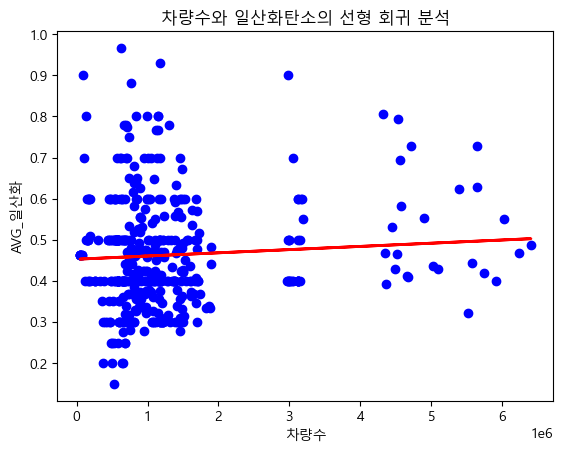

In [97]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


mean_value = result_df['AVG_일산화'].mean()
result_df['AVG_일산화'].fillna(mean_value, inplace=True)

# 독립 변수와 종속 변수 선택
X = result_df['차량수'].values.reshape(-1, 1)  # 차량수를 독립 변수로 선택
y = result_df['AVG_일산화'].values  # AVG_일산화를 종속 변수로 선택

# 데이터 분할 (학습 데이터와 테스트 데이터로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

# 회귀 계수와 절편 확인
print('회귀 계수 (기울기):', model.coef_[0])
print('절편:', model.intercept_)

# 모델 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('평균 제곱 오차 (MSE):', mse)
print('결정 계수 (R-squared):', r2)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('차량수')
plt.ylabel('AVG_일산화')
plt.title('차량수와 일산화탄소의 선형 회귀 분석')
plt.show()


회귀 계수 (기울기): 7.79654529698095e-09

회귀 모델에서 독립 변수인 "차량수"와 종속 변수인 "AVG_일산화" 간의 관계를 설명하는 기울기입니다.
이 값은 매우 작은 양수 값으로, "차량수"가 증가할 때 "AVG_일산화"가 양의 방향으로 약간 증가한다는 것을 나타냅니다.
하지만 기울기가 매우 작기 때문에 "차량수"와 "AVG_일산화" 간의 선형 관계가 매우 약하다고 해석할 수 있습니다.
절편: 0.45271230965787956

회귀 모델에서 "차량수"가 0일 때 "AVG_일산화"의 예측값입니다.
절편은 "차량수"가 0인 경우의 "AVG_일산화"의 기본 수준을 나타냅니다.
이 경우, "차량수"가 0인 상황에서도 "AVG_일산화"의 예측값이 0.45271230965787956으로 나타납니다.
평균 제곱 오차 (MSE): 0.01623384470307544

모델의 예측값과 실제 값 간의 평균 제곱 오차를 나타내는 지표입니다.
이 값은 모델의 예측이 실제 값에서 평균적으로 얼마나 벗어났는지를 나타냅니다. 값이 작을수록 모델의 예측이 더 정확하다는 것을 의미합니다.
결정 계수 (R-squared): 0.007995700751837642

모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타내는 지표입니다.
R-squared 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 종속 변수를 잘 설명한다는 것을 의미합니다.
이 경우, R-squared 값이 매우 낮아 모델이 종속 변수 "AVG_일산화"의 변동성을 거의 설명하지 못한다고 해석할 수 있습니다. 모델이 데이터를 잘 적합하지 못한다는 것을 나타냅니다.
종합적으로, 주어진 회귀 모델은 "차량수"와 "AVG_일산화" 간의 약한 양의 선형 관계를 나타내며, 모델이 종속 변수의 변동성을 잘 설명하지 못한다고 할 수 있습니다. 결과적으로 "차량수"가 "AVG_일산화"를 예측하는 데 큰 영향을 미치지 않는다고 해석할 수 있습니다.

회귀 계수 (기울기): 1.8044467383990728e-09
절편: 0.015786740375208812
평균 제곱 오차 (MSE): 4.53869845074316e-05
결정 계수 (R-squared): 0.09525115147413588


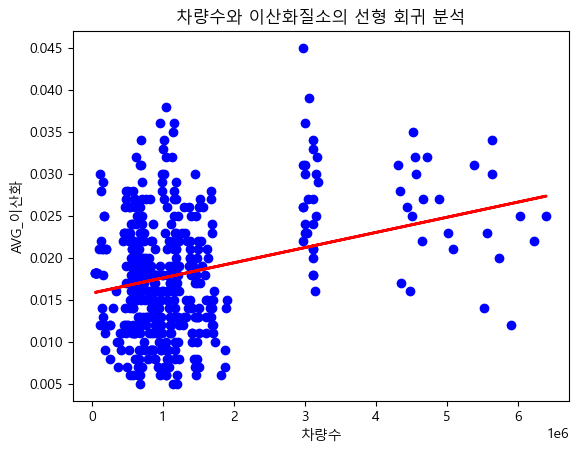

In [98]:
# 필요한 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


mean_value = result_df['AVG_이산화'].mean()
result_df['AVG_이산화'].fillna(mean_value, inplace=True)

# 독립 변수와 종속 변수 선택
X = result_df['차량수'].values.reshape(-1, 1)  # 차량수를 독립 변수로 선택
y = result_df['AVG_이산화'].values  # AVG_이산화를 종속 변수로 선택

# 데이터 분할 (학습 데이터와 테스트 데이터로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

# 회귀 계수와 절편 확인
print('회귀 계수 (기울기):', model.coef_[0])
print('절편:', model.intercept_)

# 모델 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('평균 제곱 오차 (MSE):', mse)
print('결정 계수 (R-squared):', r2)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('차량수')
plt.ylabel('AVG_이산화')
plt.title('차량수와 이산화질소의 선형 회귀 분석')
plt.show()


In [99]:
result_df.pivot_table('차량수', '이산화_BAD', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,차량수,차량수,차량수,차량수,차량수,차량수
이산화_BAD,,,,,,
N,1318,1.094799e+06,43568.0,6346842.0,9.438749e+05,8.908998e+11
Y,1018,1.620225e+06,95440.0,6402756.0,1.430066e+06,2.045090e+12


이 통계 데이터는 '이산화_BAD'라는 변수에 따른 차량 수의 요약 통계를 제공합니다. 여기서 '이산화_BAD'는 'N'과 'Y'의 두 카테고리로 나뉩니다. 각 카테고리의 통계는 다음과 같이 해석됩니다:

이산화_BAD = N

개수 (Count): 1318개의 관측치가 있습니다.
평균 (Mean): 차량 수의 평균은 약 1,094,799대입니다.
최소값 (Min): 가장 적은 차량 수는 43,568대입니다.
최대값 (Max): 가장 많은 차량 수는 6,346,842대입니다.
표준편차 (Std): 차량 수의 표준편차는 약 943,874.9대로, 차량 수의 분포가 상당히 넓게 퍼져 있음을 나타냅니다.
분산 (Var): 분산은 약 890,899,800,000으로, 이 역시 차량 수의 큰 변동성을 보여줍니다.
이산화_BAD = Y

개수 (Count): 1018개의 관측치가 있습니다.
평균 (Mean): 차량 수의 평균은 약 1,620,225대입니다.
최소값 (Min): 가장 적은 차량 수는 95,440대입니다.
최대값 (Max): 가장 많은 차량 수는 6,402,756대입니다.
표준편차 (Std): 차량 수의 표준편차는 약 1,430,066대로, 이 경우에도 차량 수의 분포가 매우 넓게 퍼져 있음을 나타냅니다.
분산 (Var): 분산은 약 2,045,090,000,000으로, 역시 매우 큰 변동성을 보여줍니다.
종합적으로, '이산화_BAD'가 'Y'인 경우 차량 수의 평균과 분포가 'N'인 경우보다 더 크다는 것을 알 수 있습니다. 이는 '이산화_BAD'가 'Y'일 때 차량 수가 평균적으로 더 많고, 그 변동성도 더 크다는 것을 의미합니다. 그러나 이 데이터만으로는 '이산화_BAD'의 정확한 의미나 이러한 차이의 원인을 정확히 파악하기 어렵습니다. 추가적인 정보가 필요할 것으로 보입니다.

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


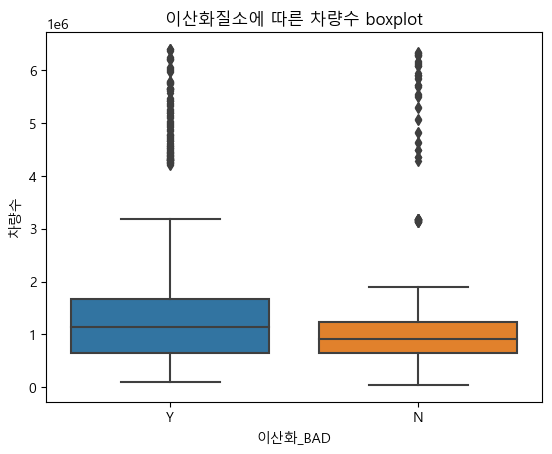

In [101]:
sns.boxplot(result_df, x='이산화_BAD', y='차량수')
plt.title('이산화질소에 따른 차량수 boxplot');

In [102]:
import scipy as sp 
sp.stats.ttest_ind(result_df[result_df.이산화_BAD=='Y'].차량수, result_df[result_df.이산화_BAD=='N'].차량수, equal_var=False)

Ttest_indResult(statistic=10.140258501029605, pvalue=1.724963235890508e-23)

제공된 통계 결과는 두 그룹('이산화_BAD'가 'Y'인 경우와 'N'인 경우)의 차량 수 간에 독립 표본 t-검정을 실시한 결과입니다. 이 결과는 다음과 같이 해석됩니다:

통계량 (Statistic): 10.140258501029605

t-통계량 값은 약 10.14입니다. 이 값은 두 그룹 간 차량 수의 평균이 상당히 다르다는 것을 나타냅니다. 보통, t-통계량의 절대값이 크면 클수록 두 집단 간의 차이가 크다고 해석할 수 있습니다.
p-값 (P-value): 1.724963235890508e-23

p-값은 매우 작은 값으로, 이는 통계적으로 매우 유의미한 결과입니다. 일반적으로 p-값이 0.05 이하일 때, 우리는 두 그룹 간의 평균 차이가 우연히 발생했다고 볼 확률이 매우 낮다고 판단합니다. 이 경우 p-값이 0.05보다 훨씬 작으므로, '이산화_BAD'가 'Y'인 그룹과 'N'인 그룹의 차량 수 평균이 우연히 다르다고 보기 어렵습니다.
등분산성 가정 (Equal Var): False

이 검정은 두 그룹의 분산이 같지 않다고 가정한 상태에서 수행되었습니다. 이는 두 데이터 집단의 분산이 서로 다를 것으로 예상되었음을 의미합니다.
종합적으로, 이 결과는 '이산화_BAD'의 값에 따라 차량 수의 평균에 통계적으로 유의미한 차이가 있음을 보여줍니다. '이산화_BAD'가 'Y'인 그룹과 'N'인 그룹 사이에는 차량 수의 평균이 다르며, 이 차이는 우연히 발생했을 가능성이 매우 낮습니다. 따라서 '이산화_BAD' 변수가 차량 수에 영향을 미칠 가능성이 높다고 해석할 수 있습니다.

In [103]:
sp.stats.ttest_ind(result_df[result_df['이산화_0.03BAD'] == 'Y']['차량수'], result_df[result_df['이산화_0.03BAD'] == 'N']['차량수'], equal_var=False)


Ttest_indResult(statistic=12.260618221973047, pvalue=1.478244880090374e-24)

독립 표본 t-검정의 결과입니다. 이 결과는 다음과 같이 해석됩니다:

통계량 (Statistic): 12.260618221973047

t-통계량 값은 약 12.26입니다. 이 값은 두 그룹 간 평균 차이가 상당히 크다는 것을 나타냅니다. 일반적으로 t-통계량의 절대값이 클수록, 두 집단 간의 평균 차이가 더 크다고 해석할 수 있습니다.
p-값 (P-value): 1.478244880090374e-24

p-값은 매우 작은 값으로, 이는 통계적으로 매우 유의미한 결과입니다. 일반적으로 p-값이 0.05 이하일 때, 우리는 두 그룹 간의 평균 차이가 우연히 발생했다고 볼 확률이 매우 낮다고 판단합니다. 이 경우, p-값이 0.05보다 훨씬 작으므로, 두 그룹의 평균 차이가 우연히 발생했다고 보기 어렵습니다.
이러한 결과는 두 그룹 간에 통계적으로 유의미한 차이가 있다는 것을 나타냅니다. 즉, 이 결과는 검정 대상이 된 두 그룹(여기서는 특정 기준에 따라 구분된 그룹일 것으로 추정됩니다) 사이에 평균 차량 수에서 통계적으로 의미 있는 차이가 존재한다는 것을 보여줍니다. 이 차이는 우연히 발생한 것이 아니라는 강력한 증거를 제공합니다.

In [104]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_일산화,일산화_9BAD,일산화_BAD,차량수,AVG_이산화,이산화_0.06BAD,이산화_0.03BAD,이산화_BAD
0,서울특별시,201101,0.7,N,Y,2991173.0,0.035,N,Y,Y
1,부산광역시,201101,0.4,N,N,1153513.0,0.019,N,N,Y


In [105]:

df =result_df.loc[:, ~result_df.columns.str.contains('BAD')]
# BAD라는 문자를 포함하고 있는 콜롬 필터링


In [106]:
result_df.head()

,SIDO,STD_YYYYMM,AVG_일산화,일산화_9BAD,일산화_BAD,차량수,AVG_이산화,이산화_0.06BAD,이산화_0.03BAD,이산화_BAD
0,서울특별시,201101,0.7,N,Y,2991173.0,0.035,N,Y,Y
1,부산광역시,201101,0.4,N,N,1153513.0,0.019,N,N,Y
2,대구광역시,201101,0.5,N,Y,953292.0,0.024,N,N,Y
3,인천광역시,201101,0.6,N,Y,931279.0,0.031,N,Y,Y
4,광주광역시,201101,0.6,N,Y,521402.0,0.024,N,N,Y


C:\Users\human\AppData\Local\Temp\ipykernel_15904\2433373194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['STD_YYYYMM'].astype(str).str[:4].astype(int)
C:\Users\human\AppData\Local\Temp\ipykernel_15904\2433373194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['STD_YYYYMM'].astype(str).str[4:].astype(int)


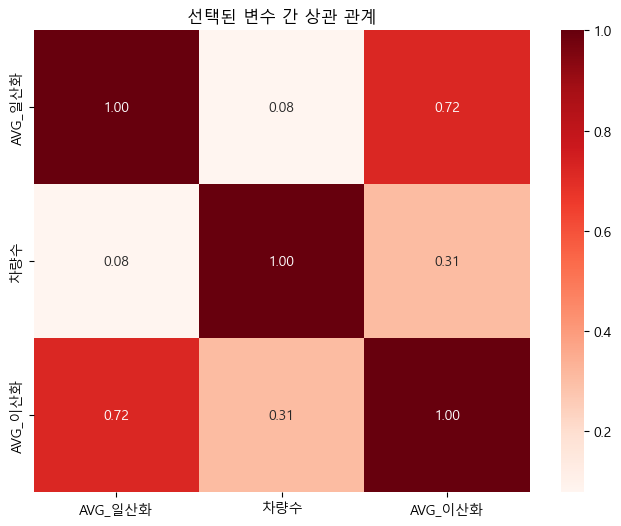

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 날짜 데이터 변환
df['Year'] = df['STD_YYYYMM'].astype(str).str[:4].astype(int)
df['Month'] = df['STD_YYYYMM'].astype(str).str[4:].astype(int)

# 시도 원-핫 인코딩
sido_dummies = pd.get_dummies(df['SIDO'], prefix='SIDO')
df = pd.concat([df, sido_dummies], axis=1)

# 필요한 경우, 원래 'STD_YYYYMM' 및 'SIDO' 컬럼 제거
df.drop(['STD_YYYYMM', 'SIDO'], axis=1, inplace=True)

# 전체 상관관계 행렬 계산
full_corr_matrix = df.corr()

# 시각화용 상관관계 행렬 생성 (시간 및 도시 컬럼 제외)
visualization_columns = [col for col in df.columns if 'Year' not in col and 'Month' not in col and not col.startswith('SIDO')]
vis_corr_matrix = df[visualization_columns].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(vis_corr_matrix, annot=True, fmt=".2f", cmap='Reds')
plt.title('선택된 변수 간 상관 관계')
plt.show()


In [108]:
df.tail()

,AVG_일산화,차량수,AVG_이산화,Year,Month,SIDO_경기도,SIDO_경상남도,SIDO_경상북도,SIDO_광주광역시,SIDO_대구광역시,...,SIDO_부산광역시,SIDO_서울특별시,SIDO_세종특별자치시,SIDO_울산광역시,SIDO_인천광역시,SIDO_전라남도,SIDO_전라북도,SIDO_제주특별자치도,SIDO_충청남도,SIDO_충청북도
2331,0.463,1219974.0,0.017,2023,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2332,0.391,982378.0,0.013,2023,2,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2333,0.404,1240837.0,0.011,2023,2,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2334,0.428,1532547.0,0.013,2023,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2335,0.340,693716.0,0.008,2023,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
